# Penn parsing with nltk
## 目標
 1. transition-parsing with RNN-LSTM[C.Dyer,2014]を実装する 
 2. RNNG[C.Dyer,2016]を実装する 

## 達成ライン
 - 機械学習におけるparsingの構造を把握する
 - ベースライン手法としてのnltk.arc-eagerの挙動を確認すること
 - testデータで目標精度が達成できるかどうかを検証する

## リソース
 - Natural Language Toolkit http://www.nltk.org
 - Universal Dependency v2 http://universaldependencies.org
 - CoNLL 形式

## insight
 - nltk.dependency_graph()はdot言語で書かれたグラフへのラッパーで、nltkでは基本的な情報形式
 - SVMの学習は時間的コストが意外と大きい[今後はローカルでやるべきでない]
 - RNN-LSTMでの実装では、arc-eagerではなくarc-standardを採用する
 - NLTKはarc-eagerまでしかフォローしていない。1,2の内容はnltkの様式に沿って実装する方が再利用性が高く社会的に有用

In [1]:
# -*- coding: utf-8 -*-
import glob
import sys
import math

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import corpus
from nltk.parse import DependencyGraph, DependencyEvaluator
from nltk.parse.transitionparser import TransitionParser, Configuration, Transition
from nltk.corpus import conll2000, conll2002

In [3]:
# nltk arc eager
# 学習データは事前にsplit処理済み
parser = nltk.TransitionParser(algorithm="arc-eager")
trains = glob.glob("../auto/univ_dep_train/*.txt")
tests  = glob.glob("../auto/univ_dep_test/*.txt")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


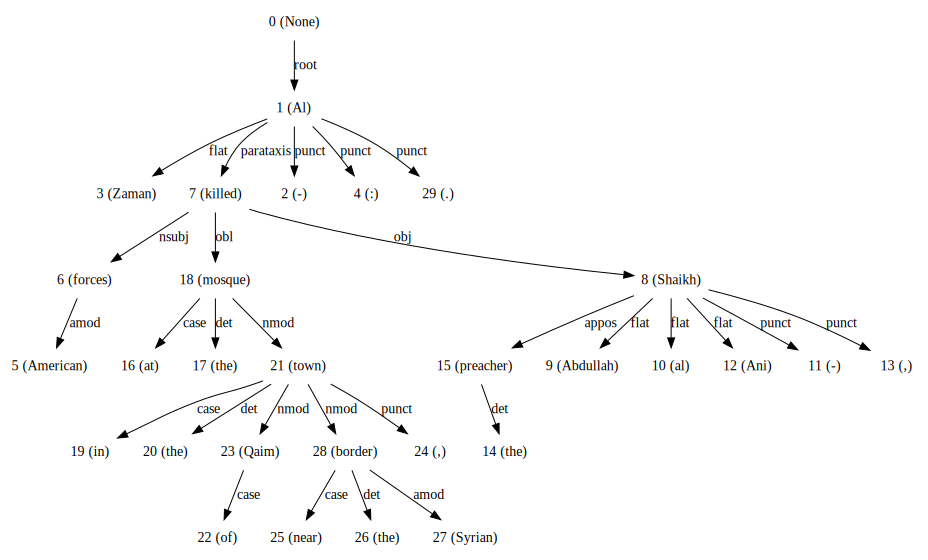

In [4]:
# trainのサンプル
S="""
1	Al	Al	PROPN	NNP	Number=Sing	0	root	_	SpaceAfter=No
2	-	-	PUNCT	HYPH	_	1	punct	_	SpaceAfter=No
3	Zaman	Zaman	PROPN	NNP	Number=Sing	1	flat	_	_
4	:	:	PUNCT	:	_	1	punct	_	_
5	American	american	ADJ	JJ	Degree=Pos	6	amod	_	_
6	forces	force	NOUN	NNS	Number=Plur	7	nsubj	_	_
7	killed	kill	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	1	parataxis	_	_
8	Shaikh	Shaikh	PROPN	NNP	Number=Sing	7	obj	_	_
9	Abdullah	Abdullah	PROPN	NNP	Number=Sing	8	flat	_	_
10	al	al	PROPN	NNP	Number=Sing	8	flat	_	SpaceAfter=No
11	-	-	PUNCT	HYPH	_	8	punct	_	SpaceAfter=No
12	Ani	Ani	PROPN	NNP	Number=Sing	8	flat	_	SpaceAfter=No
13	,	,	PUNCT	,	_	8	punct	_	_
14	the	the	DET	DT	Definite=Def|PronType=Art	15	det	_	_
15	preacher	preacher	NOUN	NN	Number=Sing	8	appos	_	_
16	at	at	ADP	IN	_	18	case	_	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	_	_
18	mosque	mosque	NOUN	NN	Number=Sing	7	obl	_	_
19	in	in	ADP	IN	_	21	case	_	_
20	the	the	DET	DT	Definite=Def|PronType=Art	21	det	_	_
21	town	town	NOUN	NN	Number=Sing	18	nmod	_	_
22	of	of	ADP	IN	_	23	case	_	_
23	Qaim	Qaim	PROPN	NNP	Number=Sing	21	nmod	_	SpaceAfter=No
24	,	,	PUNCT	,	_	21	punct	_	_
25	near	near	ADP	IN	_	28	case	_	_
26	the	the	DET	DT	Definite=Def|PronType=Art	28	det	_	_
27	Syrian	syrian	ADJ	JJ	Degree=Pos	28	amod	_	_
28	border	border	NOUN	NN	Number=Sing	21	nmod	_	SpaceAfter=No
29	.	.	PUNCT	.	_	1	punct	_	_
"""
DependencyGraph(S)

In [8]:
# mini size
graphs = []
for train in trains[:1000]:
    with open(train,"r") as f:
        graphs.append(DependencyGraph(f.read()))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


In [9]:
# =>内部に素性のインデックスを抱えている[重みは抱えていない]
# =>Libsvmを叩きに行く
parser.train(graphs,"../model/mini.md")

 Number of training examples : 1000
 Number of valid (projective) examples : 925
[LibSVM]

In [5]:
test_graphs = []
for test in tests:
    with open(test) as f:
        test_graphs.append(DependencyGraph(f.read()))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


In [10]:
result = parser.parse(test_graphs,"../model/mini.md")

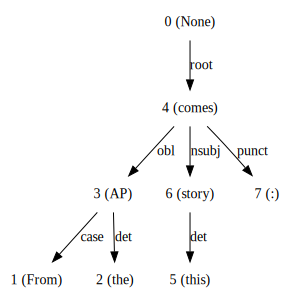

In [11]:
result[0]

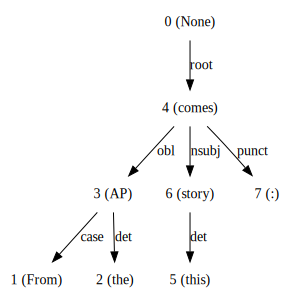

In [12]:
test_graphs[0]

In [ ]:
# middle size
# 重すぎてローカルでは動かない
graphs_mid = []
for train in trains[:2000]:
    with open(train,"r") as f:
        graphs_mid.append(DependencyGraph(f.read()))

In [ ]:
# parser_mid
parser_mid = nltk.TransitionParser(algorithm="arc-eager")
parser_mid.train(graphs_mid,"../model/mid.md")